In [1]:
from KNNClassifier import KNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [2]:
study_name = "dataset2"
device = DatasetRun.get_device()

Device used: cuda


Sample run

In [3]:
# Define the KNN metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=2, gamma_1=1, gamma_2=1, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the KNN classifier
kmeans = KMeans(n_clusters=1, metric=metric_kmeans)
clf = KNNClassifier(n_neighbors=1, metric=metric, is_normalization=True, tukey_lambda=0.5,
                        kmeans=kmeans, device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='./data/dataset2', n_tasks=6, only_last=False, verbose=True)

task 0: (time: 7.2172s)
Paper accuracy: 83.5600; My accuracy: 84.1600
task 1: (time: 4.1793s)
Paper accuracy: 76.5167; My accuracy: 76.5167
task 2: (time: 5.0672s)
Paper accuracy: 72.1286; My accuracy: 72.1143
task 3: (time: 6.5966s)
Paper accuracy: 67.6625; My accuracy: 67.6625
task 4: (time: 8.1498s)
Paper accuracy: 64.5333; My accuracy: 64.5556
task 5: (time: 9.1928s)
Paper accuracy: 62.2800; My accuracy: 62.3100


## Grid search results

plot accuracy over trials (to check how well did the grid search work)

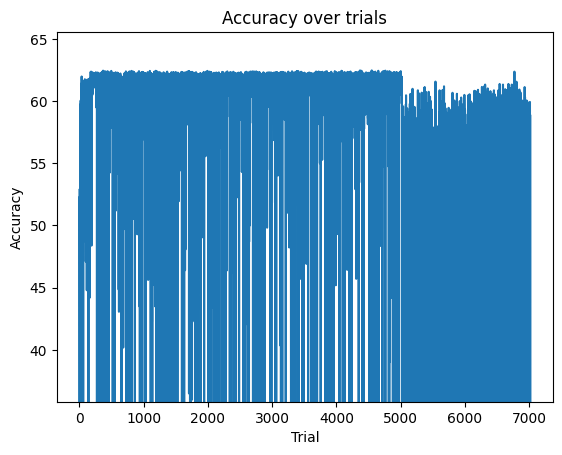

In [4]:
DatasetRun.plot_accuracy_trials(study_name=study_name, ylim=True)

plot accuracies against hyperparameters' values 

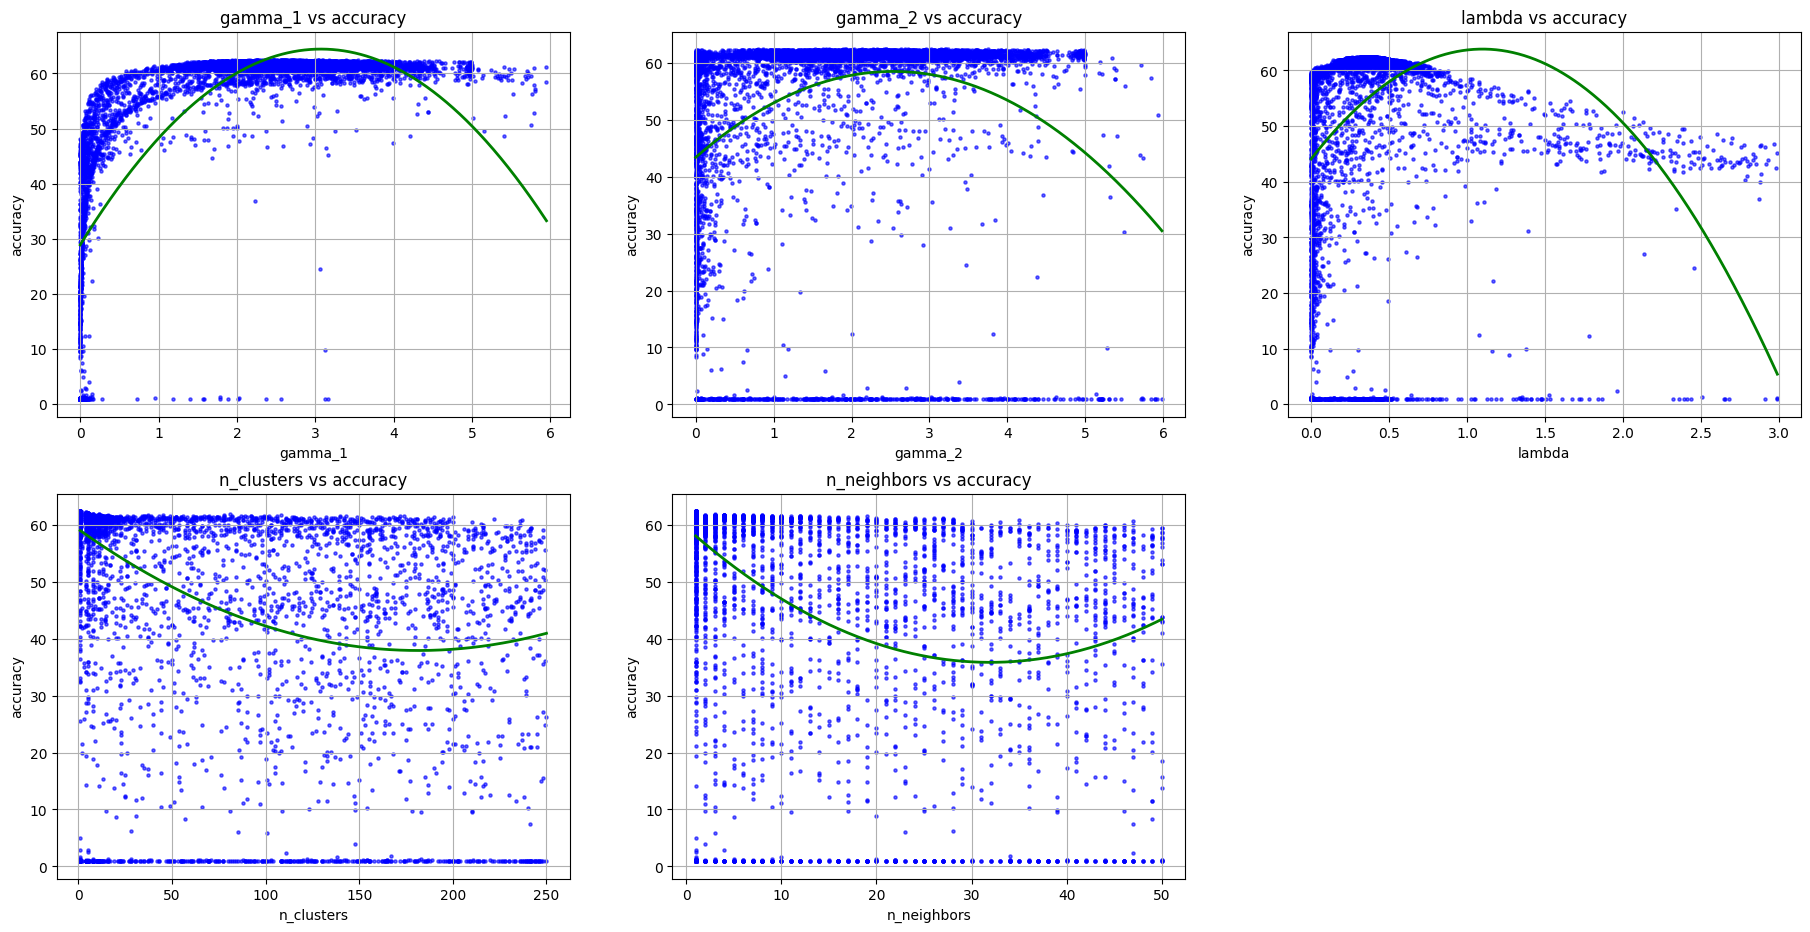

In [5]:
DatasetRun.plot_hyperparameters(study_name, columns=3, deg=2, ylim=False)

display the top hyperparameters

In [6]:
display(DatasetRun.print_results(study_name, only_important=True))

,value,gamma_1,gamma_2,lambda,n_clusters,n_neighbors
4550,62.47,2.509727,2.033876,0.357363,1,1
4368,62.47,2.461445,3.218644,0.353393,1,1
368,62.45,2.239839,2.328365,0.382294,1,1
4761,62.45,2.569796,2.442552,0.358584,1,1
4079,62.44,2.485359,1.888474,0.361933,1,1
...,...,...,...,...,...,...
5721,0.97,0.101012,3.847023,0.191061,201,49
5459,0.96,0.003876,5.894305,0.000534,47,8
5262,0.96,0.010884,1.276744,0.631046,162,38
2006,0.93,0.047789,2.016837,0.239212,1,1
